# Info 2950 Project Phase II

### Eliza Salamon, Laurel Prime, Melissa LaFountain
***

## Research Questions

 - How do different targeting attributes (e.g. age, gender, geo-targeting) affect ad type and ad exposure?
 - How are ads distributed geographically across the country?
 - How does ad spend affect impressions generated?

## Data Collection and Cleaning

Google data downloaded from https://transparencyreport.google.com/political-ads/region/US.
Specific file used is google-political-ads-creative-stats.csv

Zip Code data downloaded from http://federalgovernmentzipcodes.us/download.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
raw_data = pd.read_csv('google-political-ads-creative-stats.csv')
raw_data.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,...,Spend_Range_Min_GBP,Spend_Range_Max_GBP,Spend_Range_Min_ILS,Spend_Range_Max_ILS,Spend_Range_Min_NZD,Spend_Range_Max_NZD,Spend_Range_Min_TWD,Spend_Range_Max_TWD,Spend_Range_Min_AUD,Spend_Range_Max_AUD
0,CR104193501419274240,https://transparencyreport.google.com/politica...,Image,"EU, IT",AR100125170957549568,Azione,NaN,2020-10-26,2020-11-25,31,...,0,50.0,0,250.0,0,200.0,0,3000.0,0,150.0
1,CR109957691127889920,https://transparencyreport.google.com/politica...,Video,"EU, IT",AR100125170957549568,Azione,NaN,2020-12-02,2020-12-03,2,...,0,50.0,0,250.0,0,200.0,0,3000.0,0,150.0
2,CR111129083328331776,https://transparencyreport.google.com/politica...,Image,"EU, IT",AR100125170957549568,Azione,NaN,2020-06-28,2020-09-03,35,...,500,25000.0,2500,125000.0,1500,75000.0,30000,1500000.0,1500,50000.0
3,CR112145169511350272,https://transparencyreport.google.com/politica...,Image,"EU, IT",AR100125170957549568,Azione,NaN,2020-10-26,2020-11-02,8,...,0,50.0,0,250.0,0,200.0,0,3000.0,0,150.0
4,CR112255773509156864,https://transparencyreport.google.com/politica...,Image,"EU, IT",AR100125170957549568,Azione,NaN,2021-01-28,2021-02-04,8,...,50,500.0,250,2500.0,200,1500.0,3000,30000.0,150,1500.0


In [3]:
raw_data.columns

Index(['Ad_ID', 'Ad_URL', 'Ad_Type', 'Regions', 'Advertiser_ID',
       'Advertiser_Name', 'Ad_Campaigns_List', 'Date_Range_Start',
       'Date_Range_End', 'Num_of_Days', 'Impressions', 'Spend_USD',
       'First_Served_Timestamp', 'Last_Served_Timestamp', 'Age_Targeting',
       'Gender_Targeting', 'Geo_Targeting_Included', 'Geo_Targeting_Excluded',
       'Spend_Range_Min_USD', 'Spend_Range_Max_USD', 'Spend_Range_Min_EUR',
       'Spend_Range_Max_EUR', 'Spend_Range_Min_INR', 'Spend_Range_Max_INR',
       'Spend_Range_Min_BGN', 'Spend_Range_Max_BGN', 'Spend_Range_Min_HRK',
       'Spend_Range_Max_HRK', 'Spend_Range_Min_CZK', 'Spend_Range_Max_CZK',
       'Spend_Range_Min_DKK', 'Spend_Range_Max_DKK', 'Spend_Range_Min_HUF',
       'Spend_Range_Max_HUF', 'Spend_Range_Min_PLN', 'Spend_Range_Max_PLN',
       'Spend_Range_Min_RON', 'Spend_Range_Max_RON', 'Spend_Range_Min_SEK',
       'Spend_Range_Max_SEK', 'Spend_Range_Min_GBP', 'Spend_Range_Max_GBP',
       'Spend_Range_Min_ILS', 'Spend_R

In [ ]:
raw_data.dtypes

In [5]:
raw_data['Ad_Campaigns_List'].unique()

array([nan])

Remove non US spending ranges, Ad_Id, Ad_URL, Advertiser_ID (not useful to us), specific timestamps (already has number of days with dates), and Ad_Campaigns_List. Additionally, limit regions of ads to only the United States.

In [6]:
columns_of_interest = ['Ad_Type', 'Regions', 'Advertiser_Name', 'Date_Range_Start',
       'Date_Range_End', 'Num_of_Days', 'Impressions', 'Spend_USD','Age_Targeting',
       'Gender_Targeting', 'Geo_Targeting_Included', 'Geo_Targeting_Excluded',
       'Spend_Range_Min_USD', 'Spend_Range_Max_USD']

raw_data = raw_data[columns_of_interest]
raw_data = raw_data.loc[raw_data['Regions'] == 'US']

Select ads that have a minimum cost of $1,000 so as to filter the data to more expensive and likely more impactful  ads

In [7]:
print(raw_data['Spend_Range_Min_USD'].value_counts())
raw_data = raw_data.loc[raw_data['Spend_Range_Min_USD'] >= 1000]

0         392518
100       131844
1000       79110
50000       1261
100000       857
Name: Spend_Range_Min_USD, dtype: int64


Change date columns to datetime format

In [125]:
raw_data.loc[:, 'Date_Range_Start'] = pd.to_datetime(raw_data['Date_Range_Start'])
raw_data.loc[:, 'Date_Range_End'] = pd.to_datetime(raw_data['Date_Range_End'])

In [9]:
raw_data.to_csv('export_dataframe.csv', index = False, header=True)

In [129]:
clean_data = pd.read_csv('export_dataframe.csv')
clean_data.head()

,Ad_Type,Regions,Advertiser_Name,Date_Range_Start,Date_Range_End,Num_of_Days,Impressions,Spend_USD,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD
0,Text,US,ALEX FOR AZ,2020-07-08,2020-08-04,28,≤ 10k,1k-50k,Not targeted,Not targeted,"85054, 85207, 85215, 85250, 85251, 85253, 8525...",Not targeted,1000,50000.0
1,Text,US,ALEX FOR AZ,2020-07-07,2020-08-04,29,≤ 10k,1k-50k,Not targeted,Not targeted,"85054, 85207, 85215, 85250, 85251, 85253, 8525...",Not targeted,1000,50000.0
2,Text,US,CITIZENS FOR JD WOOTEN,2020-08-28,2020-11-03,64,10k-100k,1k-50k,Not targeted,Not targeted,"27215, 27217, 27233, 27244, 27249, 27253, 2725...",Not targeted,1000,50000.0
3,Video,US,CITIZENS FOR JD WOOTEN,2020-10-28,2020-11-03,7,100k-1M,1k-50k,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","27215, 27217, 27233, 27244, 27249, 27253, 2725...",Not targeted,1000,50000.0
4,Video,US,CITIZENS FOR JD WOOTEN,2020-10-26,2020-11-03,9,10k-100k,1k-50k,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","27215, 27217, 27233, 27244, 27249, 27253, 2725...",Not targeted,1000,50000.0


In [11]:
zips =  pd.read_csv('free-zipcode-database-Primary.csv')
zips.head()

,Zipcode,ZipCodeType,City,State,LocationType,Lat,Long,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages
0,705,STANDARD,AIBONITO,PR,PRIMARY,18.14,-66.26,NA-US-PR-AIBONITO,False,NaN,NaN,NaN
1,610,STANDARD,ANASCO,PR,PRIMARY,18.28,-67.14,NA-US-PR-ANASCO,False,NaN,NaN,NaN
2,611,PO BOX,ANGELES,PR,PRIMARY,18.28,-66.79,NA-US-PR-ANGELES,False,NaN,NaN,NaN
3,612,STANDARD,ARECIBO,PR,PRIMARY,18.45,-66.73,NA-US-PR-ARECIBO,False,NaN,NaN,NaN
4,601,STANDARD,ADJUNTAS,PR,PRIMARY,18.16,-66.72,NA-US-PR-ADJUNTAS,False,NaN,NaN,NaN


In [12]:
zips['State'].unique()

array(['PR', 'NJ', 'NY', 'AE', 'VI', 'MA', 'ME', 'NH', 'VT', 'CT', 'RI',
       'DE', 'PA', 'WV', 'KY', 'TN', 'VA', 'GA', 'IN', 'OH', 'IL', 'IA',
       'MN', 'WI', 'MT', 'ND', 'SD', 'KS', 'MO', 'NE', 'CO', 'WY', 'ID',
       'UT', 'AZ', 'NM', 'TX', 'CA', 'NV', 'OR', 'WA', 'AK', 'GU', 'HI',
       'AS', 'PW', 'FM', 'MP', 'MH', 'FL', 'SC', 'AL', 'MS', 'LA', 'AR',
       'OK', 'MI', 'DC', 'MD', 'NC', 'AA', 'AP'], dtype=object)

In [13]:
type(clean_data.loc[0, 'Geo_Targeting_Included'])

str

In [14]:
list_zips = [item.split(', ') for item in clean_data['Geo_Targeting_Included']]

In [ ]:
#list for new column
zip_column = []
#loop through geographic targetings
for x in range(len(list_zips)):
    if(x%5000 == 0):
        #track loop progress
        print(x)
    list_of_zips = []
    for zip in list_zips[x]:
        if zip.isdigit():
            #find numeric zip codes from the zipcode database, and save to nested list
            int_zip = int(zip)
            zips_item = zips.loc[zips['Zipcode'] == int_zip]
            if(len(zips_item) == 1):
                list_of_zips.append(zips_item['City'].item().capitalize())
        else:
            list_of_zips.append(zip)
    #append list to column list
    zip_column.append(set(list_of_zips))

In [24]:
clean_data['Areas_Targeted'] = zip_column
clean_data.head()

,Ad_Type,Regions,Advertiser_Name,Date_Range_Start,Date_Range_End,Num_of_Days,Impressions,Spend_USD,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD,Areas_Targeted
0,Text,US,ALEX FOR AZ,2020-07-08,2020-08-04,28,≤ 10k,1k-50k,Not targeted,Not targeted,"85054, 85207, 85215, 85250, 85251, 85253, 8525...",Not targeted,1000,50000.0,"{Cave creek, Phoenix, Fort mcdowell, Scottsdal..."
1,Text,US,ALEX FOR AZ,2020-07-07,2020-08-04,29,≤ 10k,1k-50k,Not targeted,Not targeted,"85054, 85207, 85215, 85250, 85251, 85253, 8525...",Not targeted,1000,50000.0,"{Cave creek, Phoenix, Fort mcdowell, Scottsdal..."
2,Text,US,CITIZENS FOR JD WOOTEN,2020-08-28,2020-11-03,64,10k-100k,1k-50k,Not targeted,Not targeted,"27215, 27217, 27233, 27244, 27249, 27253, 2725...",Not targeted,1000,50000.0,"{Julian, Snow camp, Greensboro, Graham, Climax..."
3,Video,US,CITIZENS FOR JD WOOTEN,2020-10-28,2020-11-03,7,100k-1M,1k-50k,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","27215, 27217, 27233, 27244, 27249, 27253, 2725...",Not targeted,1000,50000.0,"{Julian, Snow camp, Greensboro, Graham, Climax..."
4,Video,US,CITIZENS FOR JD WOOTEN,2020-10-26,2020-11-03,9,10k-100k,1k-50k,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","27215, 27217, 27233, 27244, 27249, 27253, 2725...",Not targeted,1000,50000.0,"{Julian, Snow camp, Greensboro, Graham, Climax..."


In [44]:
print(clean_data['Ad_Type'].value_counts())
print('\n')
print(clean_data['Age_Targeting'].value_counts())
print('\n')
print(clean_data['Gender_Targeting'].value_counts())

Video    55847
Text     16602
Image     8779
Name: Ad_Type, dtype: int64


Not targeted                                                36235
18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknown age         19822
18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknown age, ≤18    19333
18-24, 25-34, 35-44, 45-54, 55-64, ≥65                       2775
35-44, 45-54, 55-64, ≥65                                     1181
18-24, 25-34                                                  279
45-54, 55-64, ≥65                                             236
35-44, 45-54, 55-64, ≥65, Unknown age                         230
25-34, 35-44, 45-54, 55-64, ≥65                               211
18-24, 25-34, 35-44, 45-54                                    183
18-24, 25-34, 35-44                                           121
35-44                                                         102
25-34                                                          81
18-24, 25-34, 55-64, ≥65, Unknown age                          60
5

In [62]:
ad_types = pd.DataFrame({'Ad_Type_Code' : [1, 2, 3], 'Ad_Type' : ['Video', 'Text', 'Image']})
ad_types.head()

,Ad_Type_Code,Ad_Type
0,1,Video
1,2,Text
2,3,Image


In [63]:
google_data = pd.merge(clean_data, ad_types, on = 'Ad_Type')

In [64]:
google_data['Impressions'].unique()

array(['≤ 10k', '10k-100k', '100k-1M', '1M-10M', '> 10M'], dtype=object)

In [126]:
impression_types = pd.DataFrame({'Impression_Type' : [1, 2, 3, 4, 5], 'Impressions' : ['≤ 10k', '10k-100k', '100k-1M', '1M-10M', '> 10M']})
google_data2 = pd.merge(google_data, impression_types, on = 'Impressions')

Ad_Type                    object
Regions                    object
Advertiser_Name            object
Date_Range_Start           object
Date_Range_End             object
Num_of_Days               float64
Impressions                object
Spend_USD                  object
Age_Targeting              object
Gender_Targeting           object
Geo_Targeting_Included     object
Geo_Targeting_Excluded     object
Spend_Range_Min_USD       float64
Spend_Range_Max_USD       float64
Areas_Targeted             object
Ad_Type_Code                int64
Impression_Type             int64
dtype: object

In [66]:
google_data2.to_csv('final_dataframe.csv', index = False, header=True)

## Data Description

In doc

## Data Limitations

Mel is doing

## Exploratory Data Analysis

graphs, correlations, etc

In [190]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (12.0, 8.0)
data = pd.read_csv('final_dataframe.csv')

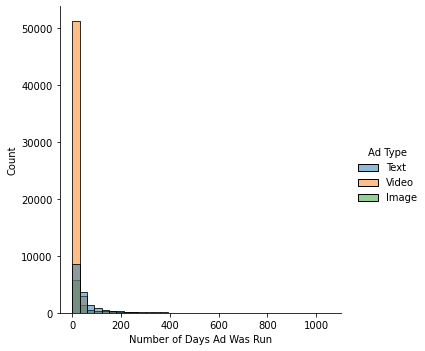

In [191]:
p = sns.displot(x = 'Num_of_Days', data = data, binwidth = 30, hue = 'Ad_Type');
plt.xlabel('Number of Days Ad Was Run');
p._legend.set_title('Ad Type')

#### There are some large outliers, so just take up to the 90th percentile of values

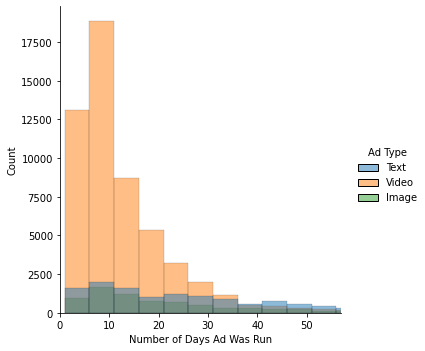

In [192]:
p = sns.displot(x = 'Num_of_Days', data = data, binwidth = 5, hue = 'Ad_Type');
plt.xlabel('Number of Days Ad Was Run');
plt.xlim([0, np.percentile(data['Num_of_Days'], 90)]);
p._legend.set_title('Ad Type')

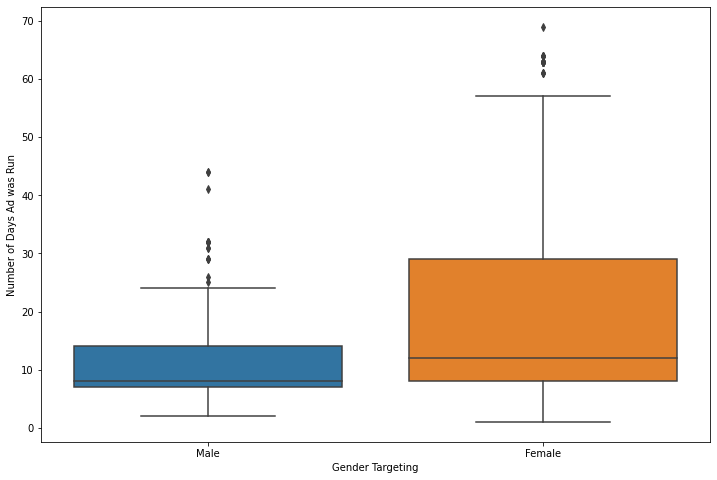

In [193]:
male_or_female = data.loc[(data['Gender_Targeting'] == 'Female') | (data['Gender_Targeting'] == 'Male')]
sns.boxplot(x = male_or_female['Gender_Targeting'], y = 'Num_of_Days', data = data);
plt.ylabel('Number of Days Ad was Run');
plt.xlabel('Gender Targeting');

In [215]:
data.loc[:, 'Date_Range_Start'] = pd.to_datetime(data['Date_Range_Start'])
data.loc[:, 'Date_Range_End'] = pd.to_datetime(data['Date_Range_End'])
data['Weekday'] = data['Date_Range_Start'].dt.weekday

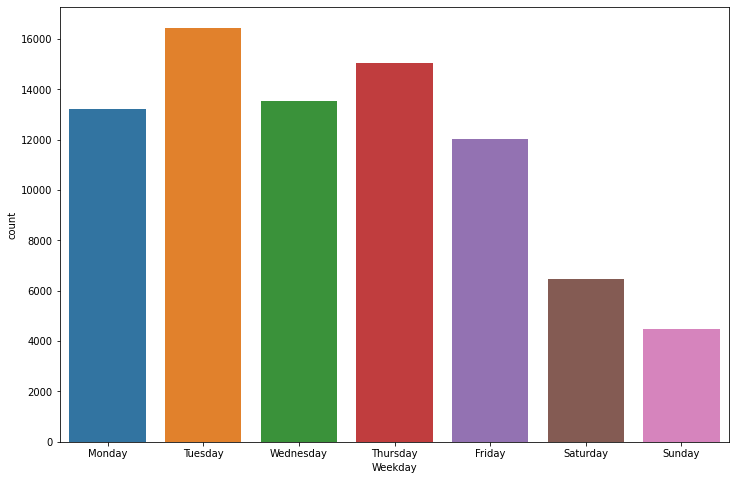

In [204]:
sns.countplot(x='Weekday', data=data);
positions = (1, 2, 3)
labels = ("A", "B", "C")
plt.xticks(np.arange(0, 7), ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'));

In [205]:
min = data['Date_Range_Start'].min()
max = data['Date_Range_End'].max()
print('Ads Date from {} to {}'.format(min, max))

Ads Date from 2018-05-31 00:00:00 to 2021-10-04 00:00:00


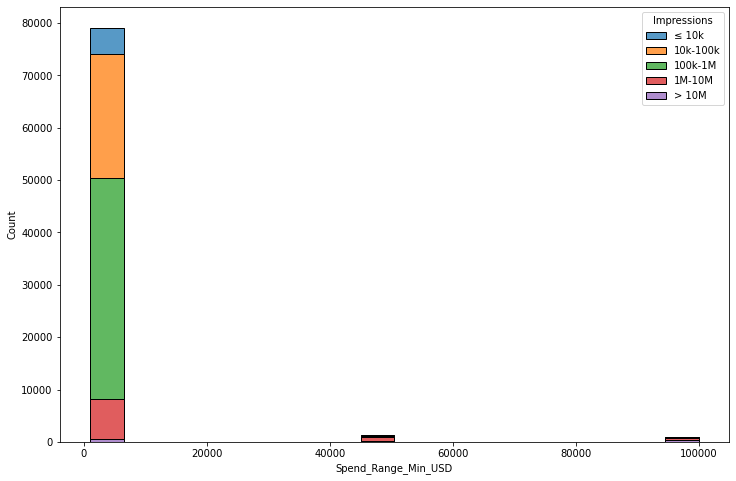

In [245]:
sns.histplot(x = 'Spend_Range_Min_USD', hue = 'Impressions', data = data, multiple = 'stack')